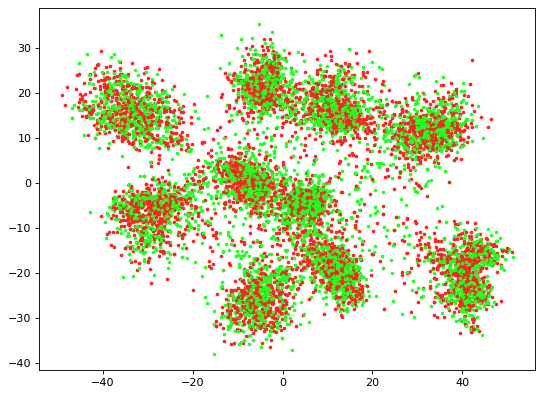

In [31]:
import tensorflow as tf
from MNISTClasses import MNISTInputData
from CellCNN.Models import CellCNN, SCellCNN
from CellCNN.Dataset import DatasetSplit
MULTI_CELL_SIZE = 1500
ODDS = [(8, ), (-1,),] # If you don't want to exclude any numbers, just set ODDS[i] to (-1,)
CHANCES = [30, 0] # how many procent of images in ODD classes should be skipped
# -> CHANCE = 100 -> very easy, CHANCE = 0 -> impossible
inp = MNISTInputData(ODDS, CHANCES, multi_cell_size = MULTI_CELL_SIZE, load_from_hd=True)
inp.plot()
FN = 2000
data = inp.datasets[0].data[:FN]
X_train, Y_train = inp.get_multi_cell_inputs(10000, DatasetSplit.TRAIN)
# X_test, Y_test = inp.get_multi_cell_inputs(1000, DatasetSplit.TEST)
X_eval, Y_eval = inp.get_multi_cell_inputs(1000, DatasetSplit.VALIDATION)

In [32]:
models = [[] for _ in range(2)]
histories = [[] for _ in models]
for i in range(5):
    print(f"---------------\nTraining models n. {i}.")
    models[0].append(CellCNN(input_shape=(None, MULTI_CELL_SIZE, 2),
                    conv=[32, 16],
                    n_classes=inp.length,
                    lr=0.01))
    models[1].append(CellCNN(input_shape=(None, MULTI_CELL_SIZE, 2),
                    conv=[32, 16],
                    n_classes=inp.length,
                    lr=0.05))
    model0 = models[0][-1]
    model1 = models[1][-1]
    model1.set_weights(model0.get_weights())
    histories[0].append(model0.fit(X_train, Y_train, epochs=5, validation_data=(X_eval, Y_eval),
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),]))
    histories[1].append(model1.fit(X_train, Y_train, epochs=5, validation_data=(X_eval, Y_eval),
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),]))

---------------
Training models n. 0.
Epoch 1/5
313/313 [==============================] - 37s 116ms/step - loss: 0.7742 - masked_accuracy: 0.5221 - accuracy: 0.5221 - binary_accuracy: 0.5221 - val_loss: 0.9109 - val_masked_accuracy: 0.4707 - val_accuracy: 0.4700 - val_binary_accuracy: 0.4700
Epoch 2/5
313/313 [==============================] - 37s 118ms/step - loss: 0.7272 - masked_accuracy: 0.5110 - accuracy: 0.5106 - binary_accuracy: 0.5106 - val_loss: 0.7482 - val_masked_accuracy: 0.4746 - val_accuracy: 0.4740 - val_binary_accuracy: 0.4740
Epoch 3/5
313/313 [==============================] - 37s 117ms/step - loss: 0.7093 - masked_accuracy: 0.5203 - accuracy: 0.5200 - binary_accuracy: 0.5200 - val_loss: 0.7454 - val_masked_accuracy: 0.4531 - val_accuracy: 0.4520 - val_binary_accuracy: 0.4520
Epoch 4/5
313/313 [==============================] - 36s 114ms/step - loss: 0.6998 - masked_accuracy: 0.5268 - accuracy: 0.5269 - binary_accuracy: 0.5269 - val_loss: 0.7746 - val_masked_accuracy

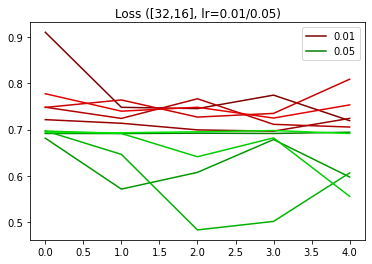

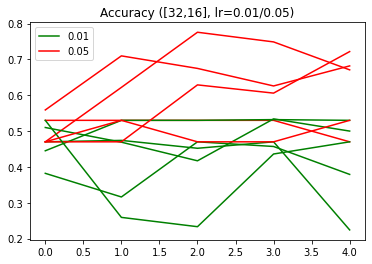

In [46]:
import matplotlib.pyplot as plt
model_epochs = len(histories[0])
def first(x):
    color = hex(int(x/(model_epochs)*255/2+127))[2:]
    if len(color)==1: color *= 2
    return "#"+color+"0000"
def second(x):
    color = hex(int(x/(model_epochs)*255/2+127))[2:]
    if len(color)==1: color *= 2
    return "#00"+color+"00"
third = lambda x: (0, 0, int(x/(model_epochs)*255))
for i in range(model_epochs):
    plt.plot(histories[0][i].history["val_loss"], c=first(i))
    plt.plot(histories[1][i].history["val_loss"], c=second(i))
plt.title("Loss ([32,16], lr=0.01/0.05)")
plt.legend(("0.01", "0.05"))
# plt.savefig("../images/lr_accuracy.png")
plt.show()

for i in range(model_epochs):
    plt.plot(histories[0][i].history["val_accuracy"], c=first(i))
    plt.plot(histories[1][i].history["val_accuracy"], c=second(i))
plt.title("Accuracy ([32,16], lr=0.01/0.05)")
plt.legend(("0.01", "0.05"))
# plt.savefig("../images/lr_loss.png")
plt.show()